In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
plt.style.use('ggplot')
sns_palette = "crest"

In [116]:
prediction_gbt = pd.read_excel("prediction_gbt.xlsx")
training_gbt_increased = pd.read_excel("prediction_gbt_increased.xlsx")
training_gbt = pd.read_excel("training_gbt.xlsx")
airflow = pd.read_excel("airflow.xlsx")

In [117]:
prediction_gbt.head()

,num_nodes,cores_per_executor,pipeline,time_spark,time_parquet,time_bash
0,1,3,prediction_gbt,00:38:40,NaN,NaN
1,1,5,prediction_gbt,00:40:24,NaN,NaN
2,2,3,prediction_gbt,00:17:32,NaN,NaN
3,2,5,prediction_gbt,00:16:25,NaN,NaN
4,3,3,prediction_gbt,00:11:30,NaN,NaN


In [118]:
prediction_gbt.dtypes

num_nodes              int64
cores_per_executor     int64
pipeline              object
time_spark            object
time_parquet          object
time_bash             object
dtype: object

In [119]:
prediction_gbt['time_spark_sec'] = prediction_gbt['time_spark'].apply(lambda t: (t.hour * 60 + t.minute) * 60 + t.second)
training_gbt_increased['time_spark_sec'] = training_gbt_increased['time_spark'].apply(lambda t: (t.hour * 60 + t.minute) * 60 + t.second)
airflow['time_airflow_sec'] = airflow['time_airflow'].apply(lambda t: (t.hour * 60 + t.minute) * 60 + t.second)
training_gbt['time_spark_sec'] = training_gbt['time_spark'].apply(lambda t: (t.hour * 60 + t.minute) * 60 + t.second)
training_gbt['num_executors'] = training_gbt['cores_per_executor'] * training_gbt['num_nodes'] -1

In [120]:
prediction_gbt[prediction_gbt['cores_per_executor'] == 3]

,num_nodes,cores_per_executor,pipeline,time_spark,time_parquet,time_bash,time_spark_sec
0,1,3,prediction_gbt,00:38:40,NaN,NaN,2320
2,2,3,prediction_gbt,00:17:32,NaN,NaN,1052
4,3,3,prediction_gbt,00:11:30,NaN,NaN,690
6,4,3,prediction_gbt,00:08:51,NaN,NaN,531
9,5,3,prediction_gbt,00:07:05,00:03:41,00:07:37,425


In [121]:
prediction_gbt_exec = prediction_gbt[prediction_gbt['cores_per_executor'] == 3]
prediction_gbt_exec['speedup'] = [1, 2.21, 3.36, 4.37, 5.46]
prediction_gbt_exec['num_executors'] = (5 * prediction_gbt['num_nodes']) -1
prediction_gbt_exec

<ipython-input-121-3c5127c1e4c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_gbt_exec['speedup'] = [1, 2.21, 3.36, 4.37, 5.46]
<ipython-input-121-3c5127c1e4c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prediction_gbt_exec['num_executors'] = (5 * prediction_gbt['num_nodes']) -1


,num_nodes,cores_per_executor,pipeline,time_spark,time_parquet,time_bash,time_spark_sec,speedup,num_executors
0,1,3,prediction_gbt,00:38:40,NaN,NaN,2320,1.00,4
2,2,3,prediction_gbt,00:17:32,NaN,NaN,1052,2.21,9
4,3,3,prediction_gbt,00:11:30,NaN,NaN,690,3.36,14
6,4,3,prediction_gbt,00:08:51,NaN,NaN,531,4.37,19
9,5,3,prediction_gbt,00:07:05,00:03:41,00:07:37,425,5.46,24


In [122]:
training_gbt_increased['speedup'] = [1, 1.93, 2.61, 3.30, 3.84]
training_gbt_increased['num_executors'] = (5 * training_gbt_increased['num_nodes']) -1
training_gbt_increased

,num_nodes,cores_per_executor,pipeline,time_spark,Unnamed: 4,time_spark_sec,speedup,num_executors
0,1,3,prediction_gbt_increased,00:52:54,NaN,3174,1.00,4
1,2,3,prediction_gbt_increased,00:27:24,NaN,1644,1.93,9
2,3,3,prediction_gbt_increased,00:20:17,NaN,1217,2.61,14
3,4,3,prediction_gbt_increased,00:16:02,NaN,962,3.30,19
4,5,3,prediction_gbt_increased,00:13:46,NaN,826,3.84,24


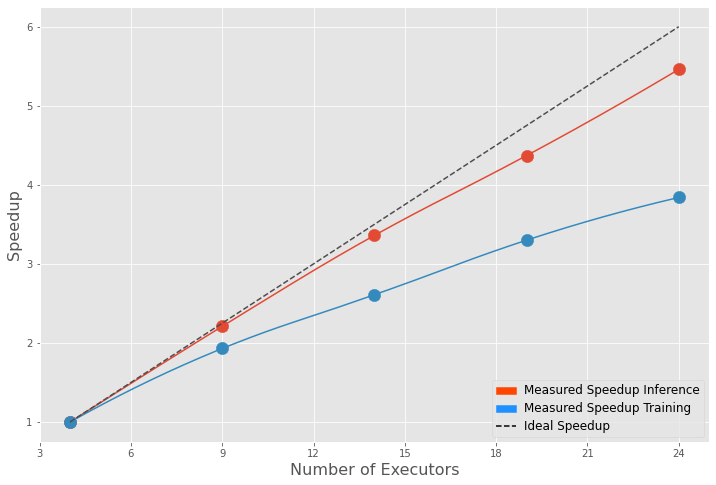

In [123]:
from scipy.interpolate import make_interp_spline, BSpline
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(figsize=(12, 8))
num_executors = prediction_gbt_exec['num_executors'].to_list()
speedup = prediction_gbt_exec['speedup'].to_list()
ax.scatter(num_executors, speedup, s=150)
xnew = np.linspace(min(num_executors), max(num_executors), 300) 
spl = make_interp_spline(num_executors, speedup, k=2)  # type: BSpline
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth)

num_executors = training_gbt_increased['num_executors'].to_list()
speedup = training_gbt_increased['speedup'].to_list()
ax.scatter(num_executors, speedup, s=150)
xnew = np.linspace(min(num_executors), max(num_executors), 300) 
spl = make_interp_spline(num_executors, speedup, k=2)  # type: BSpline
power_smooth = spl(xnew)
plt.plot(xnew, power_smooth)

#ax.plot(prediction_gbt_exec['num_executors'], prediction_gbt_exec['speedup'])
ax.plot(range(4, 26, 4), range(1, 7), ls="--", c=".3")
plt.xlabel('Number of Executors')
plt.ylabel('Speedup')
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
handles, labels = plt.gca().get_legend_handles_labels()
inference = mpatches.Patch(color='orangered', label='Measured Speedup Inference')   
training = mpatches.Patch(color='dodgerblue', label='Measured Speedup Training')  
line = Line2D([0], [0], label = 'Ideal Speedup', color='k', linestyle='--', )

handles.extend([inference, training, line])
plt.legend(handles=handles, loc='lower right')
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.savefig(f'{"Speedup - Inference Pipeline"}.png', dpi=300, bbox_inches='tight')

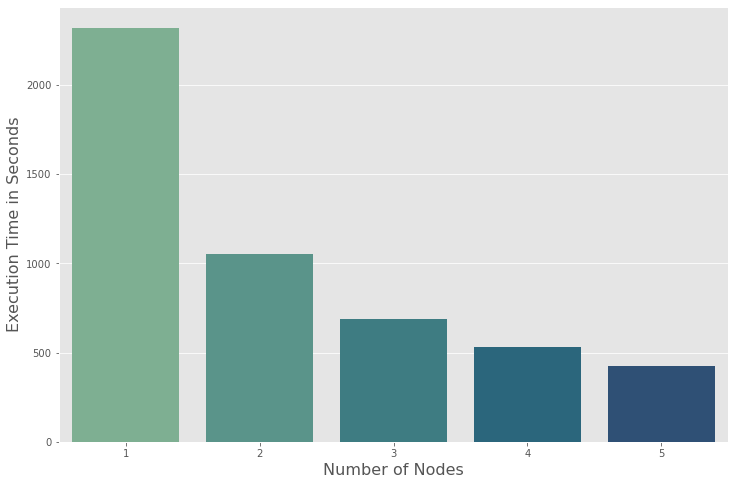

In [124]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x="num_nodes",y="time_spark_sec", data= prediction_gbt[prediction_gbt['cores_per_executor'] == 3], palette=sns_palette)
ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Execution Time in Seconds')
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
plt.savefig(f'{"Execution Time - Inference Pipeline"}.png', dpi=300, bbox_inches='tight')

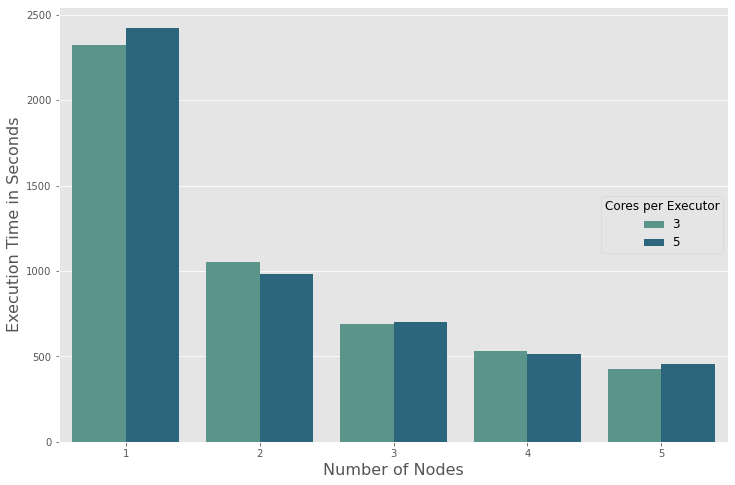

In [125]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x="num_nodes", y="time_spark_sec", hue="cores_per_executor", data= prediction_gbt, palette=sns_palette)
plt.xlabel('Number of Nodes')
plt.ylabel('Execution Time in Seconds')
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
plt.legend(title='Cores per Executor', loc='center right')
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.savefig(f'{"Execution Time by cores - Inference Pipeline"}.png', dpi=300, bbox_inches='tight')

In [126]:
pal = sns.color_palette("crest", len(training_gbt[training_gbt['cores_per_executor'] == 3]))
rank = training_gbt[training_gbt['cores_per_executor'] == 3]['time_spark_sec'].argsort().argsort() 

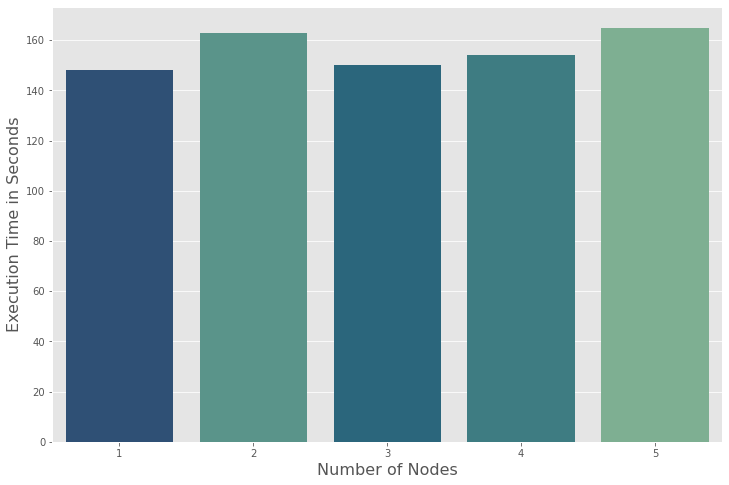

In [127]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x="num_nodes",y="time_spark_sec", data= training_gbt[training_gbt['cores_per_executor'] == 3], palette=np.array(pal[::-1])[rank])

ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Execution Time in Seconds')
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
plt.savefig(f'{"Execution Time - Training Pipeline"}.png', dpi=300, bbox_inches='tight')

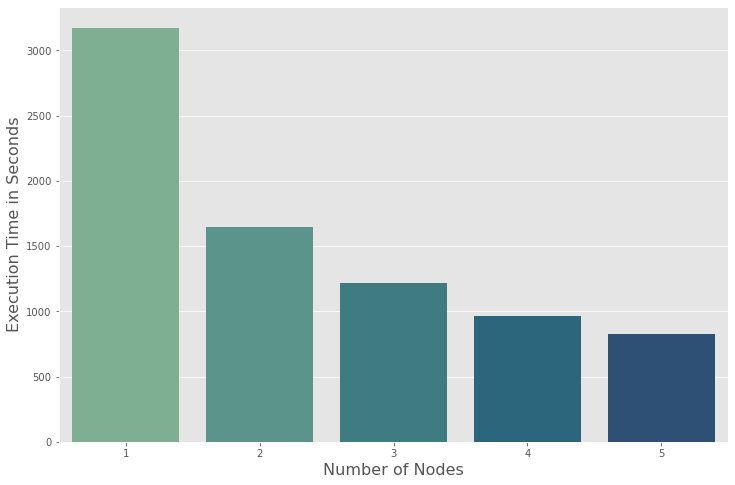

In [128]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x="num_nodes",y="time_spark_sec", data= training_gbt_increased, palette=sns_palette)

ax.set_xlabel('Number of Nodes')
ax.set_ylabel('Execution Time in Seconds')
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
plt.savefig(f'{"Execution Time - Training Pipeline Increased"}.png', dpi=300, bbox_inches='tight')

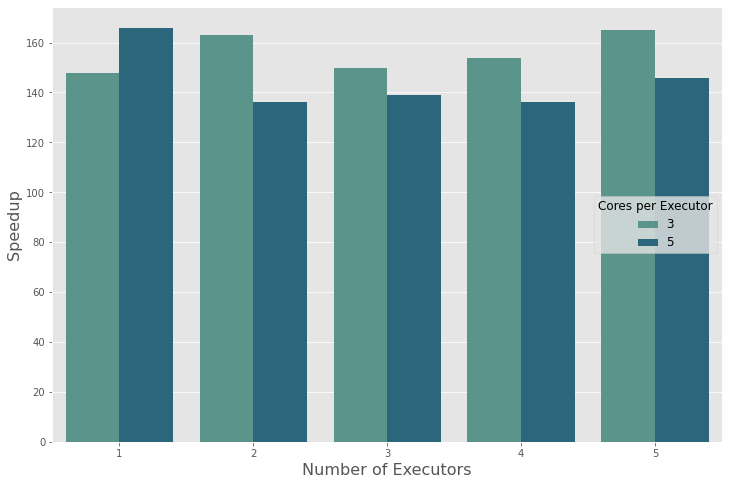

In [129]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = sns.barplot(x="num_nodes", y="time_spark_sec", hue="cores_per_executor", data= training_gbt, palette=sns_palette)
plt.xlabel('Number of Executors')
plt.ylabel('Speedup')
ax.yaxis.label.set_size(16)
ax.xaxis.label.set_size(16)
plt.legend(title='Cores per Executor', loc='center right')
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='14')
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.savefig(f'{"Execution Time by cores - Training Pipeline"}.png', dpi=300, bbox_inches='tight')

In [130]:
prediction_gbt.head(10)

,num_nodes,cores_per_executor,pipeline,time_spark,time_parquet,time_bash,time_spark_sec
0,1,3,prediction_gbt,00:38:40,NaN,NaN,2320
1,1,5,prediction_gbt,00:40:24,NaN,NaN,2424
2,2,3,prediction_gbt,00:17:32,NaN,NaN,1052
3,2,5,prediction_gbt,00:16:25,NaN,NaN,985
4,3,3,prediction_gbt,00:11:30,NaN,NaN,690
5,3,5,prediction_gbt,00:11:39,NaN,NaN,699
6,4,3,prediction_gbt,00:08:51,NaN,NaN,531
7,4,5,prediction_gbt,00:08:32,NaN,NaN,512
8,5,5,prediction_gbt,00:07:33,NaN,NaN,453
9,5,3,prediction_gbt,00:07:05,00:03:41,00:07:37,425


In [131]:
airflow.head(10)

,num_nodes,cores_per_executor,pipeline,time_spark,time_parquet,time_airflow,ingestion_prediction,processing_prediction,prediction,ingestion_training,processing_training,training,evaluation,time_airflow_sec
0,5,3,prediction_gbt_airflow,00:07:06,00:05:04,00:08:33,00:03:46,00:02:44,00:02:00,NaN,NaN,NaN,NaN,513
1,5,3,training_gbt_airflow,NaN,00:00:38,00:04:36,NaN,NaN,NaN,00:00:36,00:00:57,00:01:39,00:01:18,276
2,5,3,training_gbt_airflow_increased,NaN,NaN,00:11:46,NaN,NaN,NaN,00:02:14,00:02:27,00:03:54,00:03:06,706


In [132]:
col_pred = ['pipeline', 'time_bash', 'time_spark_sec', 'time_parquet']
col_air = ['pipeline', 'time_airflow_sec', 'time_spark', 'time_parquet']
cols = ['Pipeline', 'Overhead', 'Spark', 'Read/Write']
prediction_gbt_val = prediction_gbt[(prediction_gbt['num_nodes'] == 5) & (prediction_gbt['cores_per_executor'] == 3)][col_pred].values.tolist()
airflow_val = airflow[(airflow['cores_per_executor'] == 3)][col_air].values.tolist()


prediction_stack = pd.DataFrame(columns=col_pred, 
                  data=[prediction_gbt_val[0],
                        airflow_val[0]])

def convert_to_sec(t):
      try:
            return (t.hour * 60 + t.minute) * 60 + t.second
      except:
            return t

for col in 'time_bash time_spark_sec time_parquet'.split():
      prediction_stack[col] = prediction_stack[col].apply(lambda t: convert_to_sec(t))

In [133]:
prediction_stack.columns = cols

In [134]:
prediction_stack['Overhead'] = prediction_stack['Overhead'] - prediction_stack['Spark']
prediction_stack = prediction_stack.drop(['Read/Write'], axis=1)

In [135]:
prediction_stack

,Pipeline,Overhead,Spark
0,prediction_gbt,32,425
1,prediction_gbt_airflow,87,426


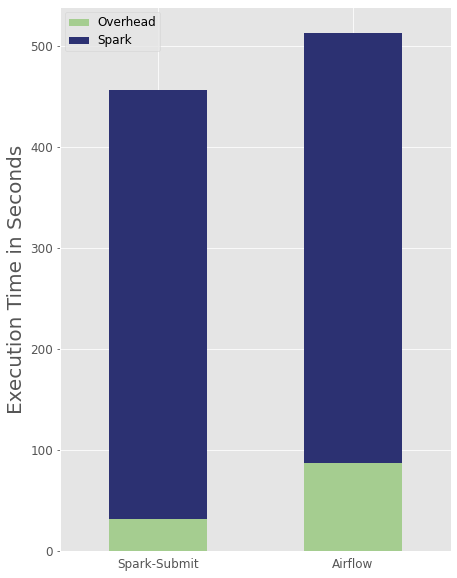

In [136]:
ax = prediction_stack.set_index('Pipeline')\
  .reindex(prediction_stack.set_index('Pipeline').sum().sort_values().index, axis=1)\
  .plot(kind='bar', stacked=True, colormap = sns_palette,
          figsize=(7,10))

ax.set_xlabel('')
ax.set_ylabel('Execution Time in Seconds')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
labels = ["Spark-Submit", "Airflow"]
ax.set_xticklabels(labels, rotation=0)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
plt.legend(loc='upper left')
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.savefig(f'{"Execution Time - Read Write Spark Airflow"}.png', dpi=300, bbox_inches='tight')

In [137]:
airflow_stack = airflow['pipeline ingestion_prediction processing_prediction prediction ingestion_training processing_training training evaluation'.split()]
for col in airflow_stack.columns:
      airflow_stack[col] = airflow_stack[col].apply(lambda t: convert_to_sec(t))

<ipython-input-137-f99ee9db2075>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airflow_stack[col] = airflow_stack[col].apply(lambda t: convert_to_sec(t))


In [138]:
airflow_stack

,pipeline,ingestion_prediction,processing_prediction,prediction,ingestion_training,processing_training,training,evaluation
0,prediction_gbt_airflow,226.0,164.0,120.0,NaN,NaN,NaN,NaN
1,training_gbt_airflow,NaN,NaN,NaN,36.0,57.0,99.0,78.0
2,training_gbt_airflow_increased,NaN,NaN,NaN,134.0,147.0,234.0,186.0


In [142]:
cols = "pipeline Ingestion Processing Training Prediction Evaluation".split()
cols_pred = "pipeline ingestion_prediction processing_prediction training prediction evaluation".split()
cols_train = "pipeline ingestion_training processing_training training prediction evaluation".split()
airflow_prediction_stack = airflow_stack.iloc[0][cols_pred].values.tolist()
airflow_training_stack = airflow_stack.iloc[2][cols_train].values.tolist()


prediction_bar = pd.DataFrame(columns=cols, 
                  data=[airflow_prediction_stack,
                        airflow_training_stack])


In [143]:
prediction_bar

,pipeline,Ingestion,Processing,Training,Prediction,Evaluation
0,prediction_gbt_airflow,226.0,164.0,NaN,120.0,NaN
1,training_gbt_airflow_increased,134.0,147.0,234.0,NaN,186.0


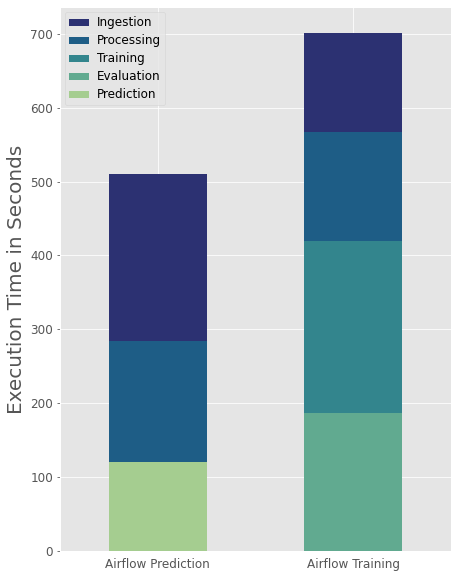

In [146]:
ax = prediction_bar.set_index('pipeline')\
  .reindex(prediction_bar.set_index('pipeline').sum().sort_values().index, axis=1)\
  .plot(kind='bar', stacked=True, colormap = sns_palette,
          figsize=(7,10))

ax.set_xlabel('')
ax.set_ylabel('Execution Time in Seconds')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=True) # labels along the bottom edge are off
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
labels = ["Airflow Prediction", "Airflow Training"]
ax.set_xticklabels(labels, rotation=0)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis='both', which='minor', labelsize=12)
handles, labels = plt.gca().get_legend_handles_labels()
order = [4,3,2,1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
#plt.legend(title='Component', loc='center right')
plt.setp(ax.get_legend().get_texts(), fontsize='12') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12')
plt.savefig(f'{"Execution Time - Components"}.png', dpi=300, bbox_inches='tight')